In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Import the linear regression module from the sci-kit learn library.
from sklearn.linear_model import LinearRegression

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

## Generate the functions

In [3]:
# Generate input/ouput (features/labels) values.
N = 100 # Number of observations (pairs of features and labels).

# True function.
x = 2.0*np.random.rand(N, 1)
y = 4.0 + 3.0*x  # eq. of a line.

# Observable function.
y_noisy = y + np.random.randn(N, 1)

## Plot the functions

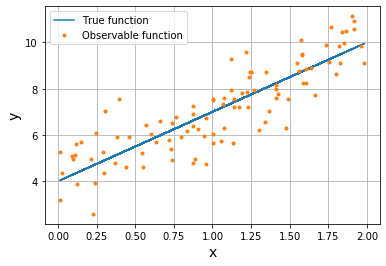

In [4]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='True function')
plt.plot(x, y_noisy, '.', label='Observable function')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## Manual solution

In [5]:
# np.c_ concatenates vectors.
X = np.c_[np.ones((N, 1)), x] # add column vector x0 with all values equal to 1.

# Solve by applying the least-Squares method.
# We use the pinv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix.
# We use dot() method for matrix multiplication.
a_optimum = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_optimum[0][0]))
print('a1: %1.4f' % (a_optimum[1][0]))

a0: 4.0763
a1: 2.9413


In [6]:
# Performing predictions with the hypothesis function.
yhat = X.dot(a_optimum)

# Calculating the Mean Squared Error (MSE).
Je_optimum = (1/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE: %1.6f' % Je_optimum)

MSE: 0.927258


## Scikit-learn's solution

+ O argumento $x$ passado para o método `fit` da classe `LinearRegression` é uma matriz com $N \times K$. 
+ Porém, lembrem-se que se existe um peso $a_0$, e portanto $x$ deveria ter dimensão $N \times K+1$, entretanto, por padrão, a classe `LinearRegression` já faz isso automaticamente para nós. 
+ Caso sua função hipótese não considere o peso $a_0$, então, durante o instanciamento da classe `LinearRegression` vocês devem configurar o parâmetro `fit_intercept=False`.

In [7]:
# Instantiate the LinearRegression class.
lin_reg = LinearRegression()

# Train the model.
lin_reg.fit(x, y_noisy)

print('a0: %1.4f' % (lin_reg.intercept_[0])) # Value that crosses the y-axis when all features are equal to 0.
print('a1: %1.4f' % (lin_reg.coef_[0][0]))   # parameters associated with the features.

# Create column vector.
a_sklearn = np.zeros((2, 1))
a_sklearn[0][0] = lin_reg.intercept_[0]
a_sklearn[1][0] = lin_reg.coef_[0][0]

a0: 4.0763
a1: 2.9413


In [8]:
yhat = X.dot(a_sklearn)

Je_sklearn = (1/N)*np.sum(np.power((y_noisy - yhat), 2))
print('MSE: %1.6f' % Je_sklearn)

MSE: 0.927258


## Comparing the solutions

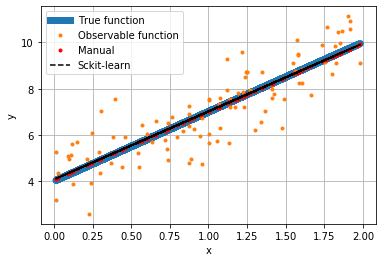

In [9]:
# Plot pair example/label.
fig = plt.figure()
plt.plot(x, y, label='True function', linewidth=7)
plt.plot(x, y_noisy, '.', label='Observable function')
plt.plot(x, X.dot(a_optimum), 'r.', label='Manual')
plt.plot(x, X.dot(a_sklearn), 'k--', label='Sckit-learn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Observações

+ Percebam que com apenas 100 exemplos, os valores obtidos são bem próximos dos exatos, porém, o ruído torna impossível recuperar os parâmetros exatos do modelo gerador.
+ Se aumentarmos o número de exemplos conseguimos melhorar a estimação, porém, o ruído limitará essa melhoria.